In [3]:
#!/opt/anaconda/envs/bd9/bin/python

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [6]:
home_dir = '/data/home/valeria.lupanova/project01'

train_file = "gender_age_dataset.txt"

train_dir = home_dir+'/'+train_file

print(home_dir+'/'+train_file)

/data/home/valeria.lupanova/project1/gender_age_dataset.txt


In [9]:
train_df = pd.read_csv(train_dir, delimiter = "\t")
train_df.head(10)

,gender,age,uid,user_json
0,F,18-24,d50192e5-c44e-4ae8-ae7a-7cfe67c8b777,"{""visits"": [{""url"": ""http://zebra-zoya.ru/2000..."
1,M,25-34,d502331d-621e-4721-ada2-5d30b2c3801f,"{""visits"": [{""url"": ""http://sweetrading.ru/?p=..."
2,F,25-34,d50237ea-747e-48a2-ba46-d08e71dddfdb,"{""visits"": [{""url"": ""http://ru.oriflame.com/pr..."
3,F,25-34,d502f29f-d57a-46bf-8703-1cb5f8dcdf03,"{""visits"": [{""url"": ""http://translate-tattoo.r..."
4,M,>=55,d503c3b2-a0c2-4f47-bb27-065058c73008,"{""visits"": [{""url"": ""https://mail.rambler.ru/#..."
5,F,25-34,d5090ddf-5648-487e-9caa-5cd8de4c60a4,"{""visits"": [{""url"": ""https://cfire.mail.ru/aut..."
6,F,25-34,d50bcef8-16ff-4e80-a9d5-9343698f4e7c,"{""visits"": [{""url"": ""http://www.msn.com/ru-ru?..."
7,F,18-24,d50e23dc-0cbd-4883-bd6c-23ce65b511cc,"{""visits"": [{""url"": ""http://www.gazprom.ru/pre..."
8,F,45-54,d50fdabb-4208-441b-ad35-bfa9c7a673ea,"{""visits"": [{""url"": ""http://lifenews.ru/"", ""ti..."
9,F,18-24,d511b480-23a6-4820-b439-9009ee63c94d,"{""visits"": [{""url"": ""https://www.google.ru/"", ..."


In [27]:
train_df['TARGET'].value_counts(dropna=False)

 0.0    294607
 1.0     26156
NaN          1
Name: TARGET, dtype: int64

We have 1 row with Nan target, let's delete this row:

In [28]:
train_df.shape

(320764, 117)

In [29]:
train_df = train_df[train_df['TARGET'].notna()]
train_df.shape

(320763, 117)

Let's transform target to int

In [30]:
train_df['TARGET'] = train_df['TARGET'].round(0).astype(int)

In [31]:
train_df['TARGET'].value_counts(dropna = False)

0    294607
1     26156
Name: TARGET, dtype: int64

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Columns: 117 entries, Unnamed: 0 to TARGET
dtypes: float64(100), int64(4), object(13)
memory usage: 288.8+ MB


Let's look at the object type columns first

In [33]:
object_columns = train_df.select_dtypes(include=object).columns
train_df.select_dtypes(include=object)

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
1,NaN,NaN,NaN,NaN,офис-менеджер,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
2,NaN,NaN,NaN,NaN,консультант,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01
4,NaN,NaN,NaN,NaN,экономист,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
6,NaN,NaN,NaN,NaN,Младший научный сотрудник,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01
7,NaN,M,RENT,NaN,ДИРЕКТОР,Y,UH,N,N,MANAGER,PRIVATE,PRIVATE,O01
8,FRIEND,V,NaN,MANAGER,СПЕЦИАЛИСТ,NaN,H,NaN,NaN,SPECIALIST,PRIVATE,PRIVATE,K01
9,NaN,NaN,NaN,NaN,глав.бухгалтер,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01


In [34]:
train_df.select_dtypes(include=object).describe()

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
count,62935,61775,53722,40522,190393,51896,61665,51896,51895,54780,60986,60986,320763
unique,22,13,5,4,19053,2,17,2,2,4,4,4,12
top,FRIEND,M,SO,SPECIALIST,ДИРЕКТОР,N,H,N,N,SPECIALIST,PRIVATE,PRIVATE,102
freq,22613,27848,25461,22741,10075,32938,38499,47829,29760,33154,53529,53529,105756


In [35]:
train_df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Data columns (total 13 columns):
CLNT_TRUST_RELATION            62935 non-null object
APP_MARITAL_STATUS             61775 non-null object
APP_KIND_OF_PROP_HABITATION    53722 non-null object
CLNT_JOB_POSITION_TYPE         40522 non-null object
CLNT_JOB_POSITION              190393 non-null object
APP_DRIVING_LICENSE            51896 non-null object
APP_EDUCATION                  61665 non-null object
APP_TRAVEL_PASS                51896 non-null object
APP_CAR                        51895 non-null object
APP_POSITION_TYPE              54780 non-null object
APP_EMP_TYPE                   60986 non-null object
APP_COMP_TYPE                  60986 non-null object
PACK                           320763 non-null object
dtypes: object(13)
memory usage: 34.3+ MB


Let's transform object values into numbers

In [36]:
le = preprocessing.LabelEncoder()
for column_name in train_df.columns:
    if train_df[column_name].dtype == object:
        train_df[column_name] = le.fit_transform(train_df[column_name].astype(str))
    else:
        pass

In [37]:
train_df[object_columns].head()

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
0,9,10,5,4,357,2,16,2,2,4,4,4,1
1,9,10,5,4,16866,2,16,2,2,4,4,4,1
2,9,10,5,4,15545,2,16,2,2,4,4,4,1
3,9,10,5,4,357,2,16,2,2,4,4,4,9
4,9,10,5,4,18950,2,16,2,2,4,4,4,9


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Columns: 117 entries, Unnamed: 0 to TARGET
dtypes: float64(100), int64(17)
memory usage: 288.8 MB


Now let's work with int type columns

In [39]:
int_columns = train_df.select_dtypes(include=int).columns
train_df.select_dtypes(include=int).head(10)

,Unnamed: 0,ID,CR_PROD_CNT_IL,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,TARGET
0,333149,479990,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
1,303639,450480,0,9,10,5,4,16866,2,16,2,2,4,4,4,1,0
2,327113,473954,0,9,10,5,4,15545,2,16,2,2,4,4,4,1,0
3,384197,531038,0,9,10,5,4,357,2,16,2,2,4,4,4,9,0
4,202462,349303,0,9,10,5,4,18950,2,16,2,2,4,4,4,9,0
5,53398,200239,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
6,251372,398213,0,9,10,5,4,7066,2,16,2,2,4,4,4,11,0
7,71572,218413,1,9,3,3,4,2563,1,10,0,0,0,2,2,11,0
8,169965,316806,3,3,6,5,0,10801,2,4,2,2,2,2,2,9,1
9,257285,404126,0,9,10,5,4,14064,2,16,2,2,4,4,4,9,0


In [40]:
train_df[int_columns].sort_values(by=int_columns[0], ascending=True).head(20)

,Unnamed: 0,ID,CR_PROD_CNT_IL,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,TARGET
105654,0,146841,0,9,10,5,4,16506,2,16,2,2,4,4,4,9,0
232818,1,146842,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
56841,2,146843,0,9,10,5,4,1898,2,16,2,2,4,4,4,1,0
282521,3,146844,0,9,10,5,4,6169,2,16,2,2,4,4,4,9,0
168642,4,146845,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
75831,6,146847,0,9,10,5,4,2945,2,16,2,2,4,4,4,4,0
48715,7,146848,0,9,10,5,4,17167,2,16,2,2,4,4,4,11,0
245254,8,146849,0,9,10,5,4,357,2,16,2,2,4,4,4,1,1
237450,9,146850,0,9,10,5,4,2266,2,16,2,2,4,4,4,11,0
178592,10,146851,0,9,10,5,4,564,2,16,2,2,4,4,4,11,0


I suppose we can delete first two columns since it's just a sequence of numbers

In [41]:
train_df.drop([int_columns[0],int_columns[1]], axis=1, inplace=True)
int_columns = train_df.select_dtypes(include=int).columns
train_df[int_columns].tail(20)

,CR_PROD_CNT_IL,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,TARGET
320743,1,6,3,4,4,7493,1,4,1,1,0,2,2,1,0
320744,0,9,10,5,4,5194,2,16,2,2,4,4,4,1,0
320745,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
320746,0,9,10,5,4,17532,2,16,2,2,4,4,4,1,0
320747,0,9,10,5,4,2563,2,16,2,2,4,4,4,1,0
320748,0,4,3,5,4,4873,0,10,0,0,4,3,3,3,0
320749,0,9,10,5,4,3413,2,16,2,2,4,4,4,9,0
320750,0,9,10,5,4,17537,2,16,2,2,4,4,4,1,0
320751,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
320752,0,9,10,5,4,13941,2,16,2,2,4,4,4,1,0


In [42]:
train_df[int_columns].describe()

,CR_PROD_CNT_IL,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,TARGET
count,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000
mean,0.105551,7.997409,8.903574,4.578689,3.706702,5544.628676,1.735524,14.073525,1.689101,1.745435,3.605765,3.626724,3.626724,5.036753,0.081543
std,0.430364,2.237416,2.404890,1.155823,0.846430,6111.875512,0.632378,4.167708,0.715865,0.612634,0.951028,0.792329,0.792329,3.863889,0.273668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,10.000000,5.000000,4.000000,357.000000,2.000000,16.000000,2.000000,2.000000,4.000000,4.000000,4.000000,1.000000,0.000000
50%,0.000000,9.000000,10.000000,5.000000,4.000000,2563.000000,2.000000,16.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,0.000000,9.000000,10.000000,5.000000,4.000000,10575.000000,2.000000,16.000000,2.000000,2.000000,4.000000,4.000000,4.000000,9.000000,0.000000
max,11.000000,22.000000,13.000000,5.000000,4.000000,19053.000000,2.000000,17.000000,2.000000,2.000000,4.000000,4.000000,4.000000,11.000000,1.000000


In [43]:
for i in int_columns:
    print(train_df[i].unique().shape)

(12,)
(23,)
(14,)
(6,)
(5,)
(19054,)
(3,)
(18,)
(3,)
(3,)
(5,)
(5,)
(5,)
(12,)
(2,)


Now we should do something with CLNT_JOB_POSITION_TYPE	column because it has to many unique values

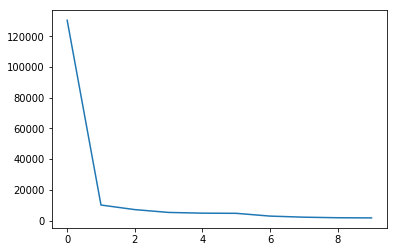

In [44]:
plt.plot(np.array(train_df[int_columns[5]].value_counts())[:10])

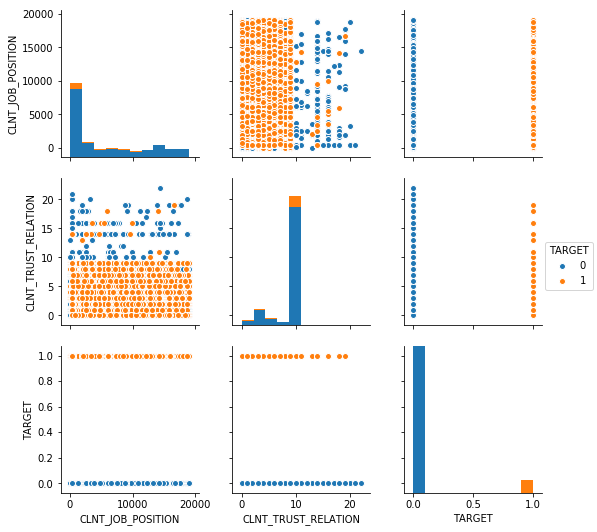

In [45]:
sns.pairplot(train_df[[int_columns[5], int_columns[1], int_columns[14]]], hue=int_columns[14])

In [46]:
int_columns[5]

'CLNT_JOB_POSITION'

In [47]:
train_df.drop(int_columns[5], axis=1, inplace=True)

In [48]:
train_df.shape

(320763, 114)

Now let's work with float type

In [49]:
float_cols = train_df.select_dtypes(float).columns

In [50]:
train_df.select_dtypes(float).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Data columns (total 100 columns):
AMOUNT_RUB_CLO_PRC            286213 non-null float64
PRC_ACCEPTS_A_EMAIL_LINK      139950 non-null float64
APP_REGISTR_RGN_CODE          54850 non-null float64
PRC_ACCEPTS_A_POS             139950 non-null float64
PRC_ACCEPTS_A_TK              139950 non-null float64
TURNOVER_DYNAMIC_IL_1M        320763 non-null float64
CNT_TRAN_AUT_TENDENCY1M       69535 non-null float64
SUM_TRAN_AUT_TENDENCY1M       69535 non-null float64
AMOUNT_RUB_SUP_PRC            286213 non-null float64
PRC_ACCEPTS_A_AMOBILE         139950 non-null float64
SUM_TRAN_AUT_TENDENCY3M       100204 non-null float64
PRC_ACCEPTS_TK                139950 non-null float64
PRC_ACCEPTS_A_MTP             139950 non-null float64
REST_DYNAMIC_FDEP_1M          320763 non-null float64
CNT_TRAN_AUT_TENDENCY3M       100204 non-null float64
CNT_ACCEPTS_TK                139950 non-null float64
REST_DYNAMIC_SAVE_3M       

As we can see, almost every column has some nan values

In [51]:
for i in train_df.select_dtypes(float).columns:
    print(len(train_df[i].unique()))

135441
2
84
2
2
1212
1126
55950
199882
2
61286
2
2
1247
1449
2
29658
5
279482
638
135753
18661
589
49568
2
2
9085
2
12
9
45820
4148
16298
215863
43460
79
834
9
61327
2677
1958
58886
80
786
5
258
422
252
728
267018
47482
73
686
108
247513
5347
253711
42955
133379
2781
3571
2860
2523
143713
1767
1355
54
126625
50
134662
43755
4165
1280
236418
926
2017
12548
1235
39824
4
40187
571
228056
4
17666
6304
2228
1321
709
677
39259
2895
275
1745
1951
4
1901
319
319
319


If column has only 2 unique values, we can drop it because there are only nans and zeros

In [52]:
for i in train_df.select_dtypes(float).columns:
    if len(train_df[i].unique()) < 3:
        train_df.drop(i, axis=1, inplace=True)

In [53]:
train_df.shape

(320763, 104)

In [54]:
for i in train_df.select_dtypes(float).columns:
    print(train_df[i].value_counts(dropna = False))

 0.000000    149072
NaN           34550
 1.000000       387
 0.577465         4
 0.959941         3
 0.679405         3
 0.005155         3
 0.079389         3
 0.482382         3
 0.090002         3
 0.087175         3
 0.062658         3
 0.535086         3
 0.502438         3
 0.209777         3
 0.108634         3
 0.705638         3
 0.135552         3
 0.001885         3
 0.851852         3
 0.278463         3
 0.143511         3
 0.713559         3
 0.019257         3
 0.242596         3
 0.428802         3
 0.124645         3
 0.168844         3
 0.054471         3
 0.471977         3
              ...  
 0.031082         1
 0.050146         1
 0.298533         1
 0.443070         1
 0.010809         1
 0.030078         1
 0.098841         1
 0.048393         1
 0.042824         1
 0.005869         1
 0.054736         1
 0.017849         1
 0.012575         1
 0.009731         1
 0.021149         1
 0.041367         1
 0.001231         1
 0.208892         1
 0.003340         1


0.000000         37478
1666.666667         60
166.666667          55
816.833333          44
1833.333333         40
10000.000000        27
5000.000000         22
833.333333          20
1750.000000         14
333.333333          13
1791.750000         13
250.000000          13
1666.833333         13
200.166667          12
20000.000000        12
1625.083333         11
500.000000          10
1611.222217         10
555.555550           9
10001.000000         9
100000.000000        9
0.120000             8
1777.888883          8
11000.000000         8
1592.740733          8
1770.958333          8
316.833333           8
800.000000           8
476.190483           7
1759.407400          7
                 ...  
182630.085933        1
26049.494783         1
52598.206883         1
7069.541867          1
9685.085900          1
163853.371933        1
230574.066367        1
15518.051900         1
647.780367           1
14710.310650         1
27727.290533         1
8551.040217          1
24160.09183

0.000000         273440
59.000000           934
118.000000          191
258.000000           74
19.666667            67
65.666667            59
69.000000            54
39.333333            54
72.333333            53
3333.333333          48
1666.666667          47
33.333333            45
49.166667            36
26.333333            35
72.166667            31
166.666667           28
333.333333           28
16.666667            23
5000.000000          23
78.666667            22
15000.000000         21
9.833333             21
83.333333            20
998.000000           20
10000.000000         19
98.333333            19
6666.666667          19
13.166667            18
20000.000000         18
13333.333333         17
                  ...  
698.643333            1
19865.868333          1
15168.766667          1
450.000000            1
13950.163333          1
86933.333333          1
130907.075000         1
5366.666667           1
521912.198333         1
3961.753333           1
495432.438333   

NaN              319059
 0.000000e+00       809
 3.722287e+05         3
 7.049824e+04         3
 2.546850e+05         3
 1.056204e+05         3
 6.329729e+04         3
 2.886654e+05         3
 2.451596e+04         3
 5.134140e+04         3
 1.516463e+05         3
 7.500000e+05         3
 3.842098e+04         3
 2.810439e+05         3
 7.565670e+05         3
 6.283914e+05         3
 3.905291e+05         3
 1.702005e+05         3
 9.283160e+03         3
 8.176830e+03         3
 1.938124e+05         3
 1.319089e+05         3
 7.016475e+04         3
 1.049874e+05         3
 6.451915e+04         3
 1.899850e+05         3
 1.594664e+05         3
 2.759844e+05         3
 3.129150e+05         3
 6.872996e+04         3
                  ...  
 1.702072e+05         1
 2.394868e+06         1
 4.808841e+05         1
 2.708775e+05         1
 5.060856e+04         1
 3.209824e+05         1
 3.205271e+04         1
 6.550135e+04         1
 9.373793e+04         1
 3.954995e+05         1
 1.753563e+06   

NaN          257148
 0.000000     59846
 1.000000       827
 0.500000       289
 0.333333        71
 0.400000        49
 0.250000        48
 0.200000        13
 0.285714        11
 0.142857        11
 0.666667         9
 0.600000         7
 0.428571         6
 0.125000         5
 0.228571         5
 0.234783         4
 0.505051         4
 0.375000         4
 0.222222         4
 0.929095         4
 0.785000         4
 0.126082         3
 0.201987         3
 0.061024         3
 0.249524         3
 0.090116         3
 0.289172         3
 0.125461         3
 0.063492         3
 0.191304         3
              ...  
 0.168211         1
 0.148310         1
 0.981839         1
 0.119621         1
 0.166667         1
 0.592920         1
 0.238176         1
 0.025363         1
 0.779356         1
 0.920093         1
 0.138745         1
 0.442184         1
 0.818182         1
 0.165767         1
 0.130919         1
 0.017160         1
 0.403587         1
 0.069469         1
 0.270786         1


0.000000    275241
1.000000      3575
0.500000      1243
0.550761        61
0.666667        60
0.572464        55
0.546083        50
0.400000        49
0.250000        33
0.600000        26
0.408776        25
0.526738        21
0.750000        21
0.030000        19
0.428571        16
0.571429        13
0.333333        13
0.010000        12
0.539062        12
0.060000         9
0.591224         9
0.375000         8
0.583333         8
0.525381         7
0.625000         7
0.449809         6
0.792740         6
0.150000         6
0.779577         6
0.454545         6
             ...  
0.598523         1
0.266411         1
0.432258         1
0.486904         1
0.243366         1
0.480549         1
0.906801         1
0.637151         1
0.994269         1
0.597717         1
0.851990         1
0.406138         1
0.546000         1
0.913398         1
0.157208         1
0.603898         1
0.685487         1
0.187132         1
0.572222         1
0.377810         1
0.493565         1
0.451239    

NaN          236349
 0.000000     81198
 1.000000       514
 0.033333       212
 0.066667       112
 0.500000        92
 0.100000        90
 0.129032        86
 0.166667        86
 0.200000        85
 0.032258        78
 0.133333        75
 0.300000        71
 0.064516        66
 0.096774        57
 0.161290        53
 0.233333        52
 0.333333        49
 0.266667        48
 0.250000        37
 0.400000        37
 0.016667        34
 0.033333        32
 0.193548        29
 0.225806        28
 0.366667        25
 0.125000        25
 0.600000        23
 0.050000        22
 0.433333        22
              ...  
 0.925926         1
 0.941176         1
 0.208333         1
 0.407407         1
 0.026316         1
 0.387097         1
 0.058333         1
 0.269231         1
 0.196970         1
 0.268817         1
 0.247312         1
 0.195960         1
 0.411765         1
 0.306452         1
 0.333333         1
 0.842105         1
 0.044444         1
 0.083333         1
 0.280000         1


Let's replace nans with mean value

In [55]:
for i in train_df.select_dtypes(float).columns:
    train_df[i].fillna(train_df[i].mean(), inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Columns: 104 entries, CR_PROD_CNT_IL to TARGET
dtypes: float64(90), int64(14)
memory usage: 267.0 MB


In [56]:
used_cols = train_df.columns

Finally, we have 103 features

In [58]:
y = train_df['TARGET']
X = train_df.drop('TARGET', axis = 1)
X.shape, y.shape

((320763, 103), (320763,))

### Here I try to preprocess data without any complex transformation and look at the difference

In [60]:
train_df = pd.read_csv(train_dir)
train_df = train_df[train_df['TARGET'].notna()]
train_df['TARGET'] = train_df['TARGET'].round(0).astype(int)
le = preprocessing.LabelEncoder()
for column_name in train_df.columns:
    if train_df[column_name].dtype == object:
        train_df[column_name] = le.fit_transform(train_df[column_name].astype(str))
for i in train_df.select_dtypes(float).columns:
    train_df[i].fillna(train_df[i].mean(), inplace=True)
used_cols = train_df.columns
y_final = train_df['TARGET']
X_final = train_df.drop('TARGET', axis = 1)

In [61]:
X_final.shape, y_final.shape

((320763, 116), (320763,))

## Let's build some model now!

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

### Decision tree 

In [64]:
x_train, x_test, y_train, y_test = train_test_split(
    X_final,
    y_final,
    test_size = 0.33,
    random_state = 42)

In [65]:
# Grid Search
decision_tree = DT(criterion='gini', random_state=0, class_weight={0: 1, 1: 10}, n_jobs=4)
parameters_dt = {'min_samples_leaf': [241], 'max_depth': [11]}
#parameters_dt = {'min_samples_leaf': [1, 10, 100], 'max_depth': [1, 10, 100]}
dt_cv = GridSearchCV(decision_tree, param_grid = parameters_dt, scoring = 'roc_auc')
dt_cv.fit(x_train, y_train)
print(dt_cv.best_params_)
predictions_dt_cv = dt_cv.predict(x_test)
probabilities_dt_cv = dt_cv.predict_proba(x_test)[:,1]
false_positive_rates_dt_cv, true_positive_rates_dt_cv, _ = roc_curve(y_test, probabilities_dt_cv)
roc_auc_dt_cv = auc(false_positive_rates_dt_cv, true_positive_rates_dt_cv)
print('ROC AUC: ', roc_auc_dt_cv)

best_params = dt_cv.best_params_
best_res = roc_auc_dt_cv

{'max_depth': 11, 'min_samples_leaf': 241}
ROC AUC:  0.8111445775687783


In [160]:
dt_cv.best_params_

{'max_depth': 11, 'min_samples_leaf': 241}

Best parameters found with grid search: max_depth=11, min_samples_leaf=241.
The result achieved:  ROC AUC=0.812772233806266

In [161]:
roc_auc_dt_cv

0.8106321207029353

Let's look at the confusion matrix as well

In [66]:
confusion_dt = pd.DataFrame(confusion_matrix(y_test, predictions_dt_cv))

TN, FP = confusion_dt[0][0], confusion_dt[0][1]

FN, TP = confusion_dt[1][0], confusion_dt[1][1]
print('Confusion matrix for Decision Tree:')
data = np.array([['','Predicted Zeros','Predicted Ones'],
            ['Zeros',TN,FP],
            ['Ones',FN,TP]])

print(pd.DataFrame(data=data[1:,1:],
              index=data[1:,0],
              columns=data[0,1:]))

Confusion matrix for Decision Tree:
      Predicted Zeros Predicted Ones
Zeros           68304           1963
Ones            28821           6764


And at the ROC curve

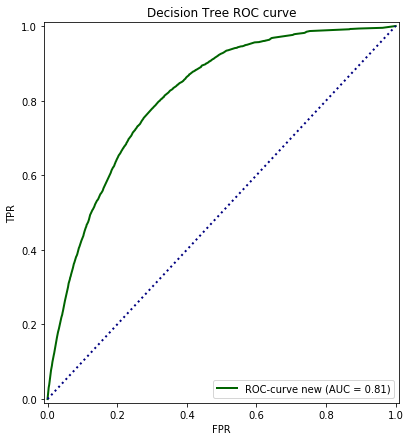

In [67]:
fig = plt.figure(figsize=(14, 7))

plot_1 = fig.add_subplot(121,
                       xlabel="FPR", xlim=(-.01, 1.01),
                       ylabel="TPR", ylim=(-.01, 1.01), title = 'Decision Tree ROC curve')

plot_1.plot(false_positive_rates_dt_cv, true_positive_rates_dt_cv,
          color='darkgreen', lw=2, label = 'ROC-curve new (AUC = %0.2f)' % roc_auc_dt_cv)
plot_1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.legend(loc="lower right")
plt.show()

### CatBoost

In [68]:
import catboost as ctboost

In [ ]:
# Grid Search
ctb = ctboost.CatBoostClassifier()
#parameters_ctb = {'n_estimators': [1,4,8]}
#parameters_dt = {'min_samples_leaf': [19, 20, 21], 'max_depth': [9, 10, 11]}
#ctb_cv = GridSearchCV(ctb, param_grid = parameters_ctb, scoring = 'roc_auc', verbose = 2)
ctb.fit(np.array(x_train), np.array(y_train))
#print(ctb.best_params_)
#predictions_ctb = ctb.predict(x_test)
probabilities_ctb = ctb.predict_proba(x_test)[:,1]
false_positive_rates_ctb, true_positive_rates_ctb, _ = roc_curve(y_test, probabilities_ctb)
roc_auc_ctb = auc(false_positive_rates_ctb, true_positive_rates_ctb)
print('ROC AUC: ', roc_auc_ctb)

The best result: ROC AUC=0.849438 and even without tuning the pyrameters!!!

### Neural network

In [70]:
import tensorflow as tf

/opt/anaconda/envs/bd9/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [71]:
x_train.shape,y_train.shape

((214911, 116), (214911,))

In [72]:
def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    bias = tf.random_normal((1,shape[1]), stddev=0.1)
    return tf.Variable(weights),tf.Variable(bias)

In [76]:
x_size=116
y_size=1

h1_size=58
h2_size=29
h3_size=10

w_1,b1 = init_weights((x_size,h1_size))
w_2,b2 = init_weights((h1_size,h2_size))
w_3,b3 = init_weights((h2_size,h3_size))
w_4,b4 = init_weights((h3_size,y_size))

In [77]:
x = tf.placeholder("float", shape=[None, x_size])
y = tf.placeholder("float", shape=[None, y_size])

h1= tf.nn.tanh(tf.add(tf.matmul(x,w_1),b1))
h2= tf.nn.tanh(tf.add(tf.matmul(h1,w_2),b2))
h3= tf.nn.tanh(tf.add(tf.matmul(h2,w_3),b3))
yhat = tf.nn.sigmoid(tf.add(tf.matmul(h3,w_4),b4))#tf.nn.relu

cost    = tf.nn.l2_loss(y-yhat)
updates = tf.train.AdamOptimizer(0.0001).minimize(cost)

In [78]:
sc=StandardScaler()
X=sc.fit_transform(X_final)

In [79]:
X_train, X_val, Y_train, Y_val=train_test_split(X, np.array(y_final), test_size=0.33, shuffle=True, random_state=42)
Y_train=Y_train.astype('float32').reshape(-1,1)
Y_val=Y_val.astype('float32').reshape(-1,1)

In [80]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

batch_size=10

for epoch in range(20):
    # Train with batches
    for i in range(int(len(X_train)/batch_size)):
        s=i*batch_size
        f=(i+1)*batch_size
        
        sess.run(updates, feed_dict={x: X_train[s: f], y: Y_train[s: f]})

    train_accuracy = sess.run(cost, feed_dict={x: X_train, y: Y_train})
    test_accuracy  = sess.run(cost, feed_dict={x: X_val, y: Y_val})

    print("Epoch = %d,train accuracy = %.2f, test accuracy = %.2f" % (epoch + 1, train_accuracy, test_accuracy))

Epoch = 1,train accuracy = 7554.17, test accuracy = 3810.96
Epoch = 2,train accuracy = 7391.46, test accuracy = 3744.91
Epoch = 3,train accuracy = 7303.02, test accuracy = 3717.64
Epoch = 4,train accuracy = 7245.70, test accuracy = 3704.54
Epoch = 5,train accuracy = 7201.45, test accuracy = 3696.91
Epoch = 6,train accuracy = 7163.54, test accuracy = 3692.16
Epoch = 7,train accuracy = 7128.76, test accuracy = 3688.62
Epoch = 8,train accuracy = 7096.20, test accuracy = 3685.63
Epoch = 9,train accuracy = 7065.36, test accuracy = 3683.20
Epoch = 10,train accuracy = 7035.83, test accuracy = 3681.24
Epoch = 11,train accuracy = 7007.50, test accuracy = 3679.90
Epoch = 12,train accuracy = 6980.19, test accuracy = 3679.10
Epoch = 13,train accuracy = 6953.68, test accuracy = 3678.90
Epoch = 14,train accuracy = 6928.26, test accuracy = 3679.50
Epoch = 15,train accuracy = 6903.90, test accuracy = 3680.89
Epoch = 16,train accuracy = 6880.59, test accuracy = 3682.82
Epoch = 17,train accuracy = 6858.

In [81]:
probabilities_mlp = sess.run(yhat, feed_dict={x: X_val})
false_positive_rates_mlp, true_positive_rates_mlp, _ = roc_curve(Y_val, probabilities_mlp)
roc_auc_mlp = auc(false_positive_rates_mlp, true_positive_rates_mlp)
print('ROC AUC: ', roc_auc_mlp)

ROC AUC:  0.7847537146732746


20 epoch, ROC AUC:  0.7847537146732746

# Now, let's finish the exercise with real test data

First, preprocessing for the test set:

In [210]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)
train_df = train_df[train_df['TARGET'].notna()]
train_df['TARGET'] = train_df['TARGET'].round(0).astype(int)
y_train = train_df['TARGET']
train_df = train_df.drop('TARGET', axis = 1)

In [211]:
train_df.shape, test_df.shape

((320763, 116), (44399, 116))

In [212]:
concat_df = pd.concat([train_df,test_df])

In [213]:
le = preprocessing.LabelEncoder()
for column_name in concat_df.columns:
    if train_df[column_name].dtype == object:
        le.fit(concat_df[column_name].astype(str))
        train_df[column_name] = le.transform(train_df[column_name].astype(str))
        test_df[column_name] = le.transform(test_df[column_name].astype(str))     
for i in train_df.select_dtypes(float).columns:
    train_df[i].fillna(train_df[i].mean(), inplace=True)
    test_df[i].fillna(train_df[i].mean(), inplace=True)

x_train = train_df
x_test = test_df
x_train.shape, x_test.shape

((320763, 116), (44399, 116))

## I've used Decision trees for the lab04:

### Desision tree

In [27]:
decision_tree = DT(min_samples_leaf=241, max_depth=11)

In [28]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=241, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
probabilities_decision_tree = decision_tree.predict_proba(x_test)[:,1]

In [237]:
A = np.array(x_test['ID']).astype(str)

In [234]:
B = np.array(probabilities_decision_tree)

In [239]:
result = pd.DataFrame(np.vstack([A,B]).T, columns=['id', 'target'])

In [ ]:
result.head()

In [243]:
result.to_csv('lab04.csv',sep='\t', index=False)

## I've used catboost for the lab04s:

### Catboost

In [214]:
ctb.fit(x_train, y_train)

Learning rate set to 0.085778
0:	learn: 0.5945874	total: 75ms	remaining: 1m 14s
1:	learn: 0.5189870	total: 143ms	remaining: 1m 11s
2:	learn: 0.4563994	total: 215ms	remaining: 1m 11s
3:	learn: 0.4109898	total: 289ms	remaining: 1m 11s
4:	learn: 0.3745091	total: 365ms	remaining: 1m 12s
5:	learn: 0.3494538	total: 444ms	remaining: 1m 13s
6:	learn: 0.3286071	total: 512ms	remaining: 1m 12s
7:	learn: 0.3135172	total: 580ms	remaining: 1m 11s
8:	learn: 0.3000190	total: 660ms	remaining: 1m 12s
9:	learn: 0.2876441	total: 725ms	remaining: 1m 11s
10:	learn: 0.2798636	total: 802ms	remaining: 1m 12s
11:	learn: 0.2726485	total: 872ms	remaining: 1m 11s
12:	learn: 0.2662087	total: 950ms	remaining: 1m 12s
13:	learn: 0.2614124	total: 1.02s	remaining: 1m 11s
14:	learn: 0.2572556	total: 1.1s	remaining: 1m 12s
15:	learn: 0.2541246	total: 1.17s	remaining: 1m 12s
16:	learn: 0.2505526	total: 1.25s	remaining: 1m 12s
17:	learn: 0.2480221	total: 1.32s	remaining: 1m 12s
18:	learn: 0.2457740	total: 1.42s	remaining: 1

157:	learn: 0.2174375	total: 14s	remaining: 1m 14s
158:	learn: 0.2174204	total: 14.1s	remaining: 1m 14s
159:	learn: 0.2173370	total: 14.2s	remaining: 1m 14s
160:	learn: 0.2172931	total: 14.3s	remaining: 1m 14s
161:	learn: 0.2172500	total: 14.4s	remaining: 1m 14s
162:	learn: 0.2172075	total: 14.5s	remaining: 1m 14s
163:	learn: 0.2171232	total: 14.6s	remaining: 1m 14s
164:	learn: 0.2171015	total: 14.6s	remaining: 1m 14s
165:	learn: 0.2170734	total: 14.7s	remaining: 1m 14s
166:	learn: 0.2170290	total: 14.8s	remaining: 1m 13s
167:	learn: 0.2169840	total: 14.9s	remaining: 1m 13s
168:	learn: 0.2169297	total: 15s	remaining: 1m 13s
169:	learn: 0.2168829	total: 15.1s	remaining: 1m 13s
170:	learn: 0.2168168	total: 15.2s	remaining: 1m 13s
171:	learn: 0.2167369	total: 15.3s	remaining: 1m 13s
172:	learn: 0.2166837	total: 15.4s	remaining: 1m 13s
173:	learn: 0.2166337	total: 15.5s	remaining: 1m 13s
174:	learn: 0.2165769	total: 15.6s	remaining: 1m 13s
175:	learn: 0.2165474	total: 15.8s	remaining: 1m 1

314:	learn: 0.2123177	total: 29.5s	remaining: 1m 4s
315:	learn: 0.2122867	total: 29.6s	remaining: 1m 4s
316:	learn: 0.2122721	total: 29.7s	remaining: 1m 3s
317:	learn: 0.2122451	total: 29.8s	remaining: 1m 3s
318:	learn: 0.2122009	total: 29.8s	remaining: 1m 3s
319:	learn: 0.2121903	total: 29.9s	remaining: 1m 3s
320:	learn: 0.2121757	total: 30s	remaining: 1m 3s
321:	learn: 0.2121404	total: 30.1s	remaining: 1m 3s
322:	learn: 0.2121152	total: 30.2s	remaining: 1m 3s
323:	learn: 0.2120888	total: 30.3s	remaining: 1m 3s
324:	learn: 0.2120755	total: 30.3s	remaining: 1m 3s
325:	learn: 0.2120497	total: 30.4s	remaining: 1m 2s
326:	learn: 0.2120000	total: 30.5s	remaining: 1m 2s
327:	learn: 0.2119876	total: 30.6s	remaining: 1m 2s
328:	learn: 0.2119734	total: 30.7s	remaining: 1m 2s
329:	learn: 0.2119531	total: 30.9s	remaining: 1m 2s
330:	learn: 0.2119108	total: 31s	remaining: 1m 2s
331:	learn: 0.2118886	total: 31s	remaining: 1m 2s
332:	learn: 0.2118437	total: 31.1s	remaining: 1m 2s
333:	learn: 0.2118

474:	learn: 0.2090142	total: 43.6s	remaining: 48.2s
475:	learn: 0.2089890	total: 43.9s	remaining: 48.3s
476:	learn: 0.2089641	total: 44s	remaining: 48.2s
477:	learn: 0.2089518	total: 44.1s	remaining: 48.1s
478:	learn: 0.2089307	total: 44.2s	remaining: 48s
479:	learn: 0.2089030	total: 44.3s	remaining: 48s
480:	learn: 0.2088794	total: 44.4s	remaining: 47.9s
481:	learn: 0.2088584	total: 44.5s	remaining: 47.9s
482:	learn: 0.2088094	total: 44.7s	remaining: 47.8s
483:	learn: 0.2087922	total: 44.8s	remaining: 47.7s
484:	learn: 0.2087683	total: 44.9s	remaining: 47.6s
485:	learn: 0.2087514	total: 45s	remaining: 47.6s
486:	learn: 0.2087190	total: 45.1s	remaining: 47.5s
487:	learn: 0.2086954	total: 45.1s	remaining: 47.4s
488:	learn: 0.2086855	total: 45.2s	remaining: 47.3s
489:	learn: 0.2086287	total: 45.3s	remaining: 47.2s
490:	learn: 0.2086056	total: 45.4s	remaining: 47.1s
491:	learn: 0.2085915	total: 45.5s	remaining: 47s
492:	learn: 0.2085813	total: 45.6s	remaining: 46.9s
493:	learn: 0.2085559	

633:	learn: 0.2062387	total: 59.6s	remaining: 34.4s
634:	learn: 0.2062112	total: 59.7s	remaining: 34.3s
635:	learn: 0.2061937	total: 59.8s	remaining: 34.2s
636:	learn: 0.2061740	total: 59.9s	remaining: 34.1s
637:	learn: 0.2061605	total: 60s	remaining: 34s
638:	learn: 0.2061434	total: 1m	remaining: 33.9s
639:	learn: 0.2061254	total: 1m	remaining: 33.8s
640:	learn: 0.2061017	total: 1m	remaining: 33.7s
641:	learn: 0.2060828	total: 1m	remaining: 33.6s
642:	learn: 0.2060671	total: 1m	remaining: 33.5s
643:	learn: 0.2060452	total: 1m	remaining: 33.4s
644:	learn: 0.2060270	total: 1m	remaining: 33.3s
645:	learn: 0.2060159	total: 1m	remaining: 33.2s
646:	learn: 0.2059944	total: 1m	remaining: 33.1s
647:	learn: 0.2059688	total: 1m	remaining: 33s
648:	learn: 0.2059541	total: 1m	remaining: 32.9s
649:	learn: 0.2059433	total: 1m	remaining: 32.8s
650:	learn: 0.2059242	total: 1m 1s	remaining: 32.7s
651:	learn: 0.2059047	total: 1m 1s	remaining: 32.6s
652:	learn: 0.2058921	total: 1m 1s	remaining: 32.5s
65

794:	learn: 0.2037228	total: 1m 14s	remaining: 19.2s
795:	learn: 0.2037011	total: 1m 14s	remaining: 19.1s
796:	learn: 0.2036870	total: 1m 14s	remaining: 19s
797:	learn: 0.2036644	total: 1m 14s	remaining: 18.9s
798:	learn: 0.2036496	total: 1m 14s	remaining: 18.8s
799:	learn: 0.2036369	total: 1m 14s	remaining: 18.7s
800:	learn: 0.2036296	total: 1m 14s	remaining: 18.6s
801:	learn: 0.2036213	total: 1m 15s	remaining: 18.5s
802:	learn: 0.2036081	total: 1m 15s	remaining: 18.4s
803:	learn: 0.2035877	total: 1m 15s	remaining: 18.4s
804:	learn: 0.2035652	total: 1m 15s	remaining: 18.3s
805:	learn: 0.2035552	total: 1m 15s	remaining: 18.2s
806:	learn: 0.2035431	total: 1m 15s	remaining: 18.1s
807:	learn: 0.2035322	total: 1m 15s	remaining: 18s
808:	learn: 0.2035162	total: 1m 15s	remaining: 17.9s
809:	learn: 0.2035012	total: 1m 15s	remaining: 17.8s
810:	learn: 0.2034944	total: 1m 15s	remaining: 17.7s
811:	learn: 0.2034870	total: 1m 16s	remaining: 17.6s
812:	learn: 0.2034573	total: 1m 16s	remaining: 17.

952:	learn: 0.2014153	total: 1m 29s	remaining: 4.43s
953:	learn: 0.2013927	total: 1m 29s	remaining: 4.33s
954:	learn: 0.2013789	total: 1m 29s	remaining: 4.24s
955:	learn: 0.2013669	total: 1m 29s	remaining: 4.14s
956:	learn: 0.2013472	total: 1m 30s	remaining: 4.05s
957:	learn: 0.2013244	total: 1m 30s	remaining: 3.95s
958:	learn: 0.2013061	total: 1m 30s	remaining: 3.86s
959:	learn: 0.2012801	total: 1m 30s	remaining: 3.76s
960:	learn: 0.2012579	total: 1m 30s	remaining: 3.67s
961:	learn: 0.2012495	total: 1m 30s	remaining: 3.57s
962:	learn: 0.2012299	total: 1m 30s	remaining: 3.48s
963:	learn: 0.2012138	total: 1m 30s	remaining: 3.38s
964:	learn: 0.2012074	total: 1m 30s	remaining: 3.29s
965:	learn: 0.2011969	total: 1m 30s	remaining: 3.19s
966:	learn: 0.2011885	total: 1m 30s	remaining: 3.1s
967:	learn: 0.2011761	total: 1m 30s	remaining: 3s
968:	learn: 0.2011531	total: 1m 30s	remaining: 2.91s
969:	learn: 0.2011386	total: 1m 31s	remaining: 2.82s
970:	learn: 0.2011343	total: 1m 31s	remaining: 2.7

In [215]:
probabilities_ctb = ctb.predict_proba(x_test)[:,1]

In [237]:
A = np.array(x_test['ID']).astype(str)

In [234]:
B = np.array(probabilities_ctb)

In [239]:
result = pd.DataFrame(np.vstack([A,B]).T, columns=['id', 'target'])

In [ ]:
result.head()

In [243]:
result.to_csv('lab04s.csv',sep='\t', index=False)